In [56]:
import pandas as pd


In [57]:
datos = pd.read_csv('datos.csv')

In [58]:
datos.sample(7)

,Ciudad,Sexo,Edad,Color,Años de Estudio,Ingreso,Altura
71086,51,0,44,2,12,1500,1.600261
24061,27,0,41,8,12,1200,1.707756
13292,22,1,36,4,2,200,1.610350
21800,26,1,44,8,12,1100,1.710148
31041,29,0,50,4,12,1200,1.813510
7181,15,1,62,2,5,300,1.691912
20267,26,0,22,2,12,788,1.636599


In [59]:
sorted(datos['Años de Estudio'].unique())

[np.int64(1),
 np.int64(2),
 np.int64(3),
 np.int64(4),
 np.int64(5),
 np.int64(6),
 np.int64(7),
 np.int64(8),
 np.int64(9),
 np.int64(10),
 np.int64(11),
 np.int64(12),
 np.int64(13),
 np.int64(14),
 np.int64(15),
 np.int64(16),
 np.int64(17)]

In [60]:
sorted(datos['Sexo'].unique())

[np.int64(0), np.int64(1)]

In [61]:
sorted(datos['Color'].unique())

[np.int64(0), np.int64(2), np.int64(4), np.int64(6), np.int64(8)]

In [62]:
sorted(datos['Ciudad'].unique())

[np.int64(11),
 np.int64(12),
 np.int64(13),
 np.int64(14),
 np.int64(15),
 np.int64(16),
 np.int64(17),
 np.int64(21),
 np.int64(22),
 np.int64(23),
 np.int64(24),
 np.int64(25),
 np.int64(26),
 np.int64(27),
 np.int64(28),
 np.int64(29),
 np.int64(31),
 np.int64(32),
 np.int64(33),
 np.int64(35),
 np.int64(41),
 np.int64(42),
 np.int64(43),
 np.int64(50),
 np.int64(51),
 np.int64(52),
 np.int64(53)]

In [63]:
datos.Edad.min()

13

In [64]:
datos.Edad.max()

99

In [65]:
print(f"La edad minima es {datos.Edad.min()} y la edad máxima es {datos.Edad.max()}")

La edad minima es 13 y la edad máxima es 99


In [66]:
print(f"La altura minima es {datos['Altura'].min()} cms y la edad máxima es {datos['Altura'].max()} cms")

La altura minima es 1.339244614 cms y la edad máxima es 2.028496765 cms


##distribuicion de frecuencias para variables cualitativas


In [67]:
datos.Sexo.value_counts()

,count
Sexo,
0,53250
1,23590


In [68]:
datos.Sexo.value_counts(normalize=True).round(4)*100

,proportion
Sexo,
0,69.3
1,30.7


In [69]:
frecuencia_sexo = datos.Sexo.value_counts()
frecuencia_sexo

,count
Sexo,
0,53250
1,23590


In [70]:
porcentaje_sexo = datos.Sexo.value_counts(normalize=True).round(4)*100
porcentaje_sexo

,proportion
Sexo,
0,69.3
1,30.7


In [71]:
dist_frec_cualitativa = pd.DataFrame({'Frecuencia': frecuencia_sexo, 'Porcentaje %': porcentaje_sexo})
dist_frec_cualitativa

,Frecuencia,Porcentaje %
Sexo,,
0,53250,69.3
1,23590,30.7


In [72]:
dist_frec_cualitativa.rename(index = {0:'Masculino', 1:'Femenino'}, implace=True)

TypeError: DataFrame.rename() got an unexpected keyword argument 'implace'

In [ ]:
dist_frec_cualitativa.rename_axis('Sexo', axis='columns', inplace=True)
dist_frec_cualitativa

In [74]:
frecuencia = pd.crosstab(datos.Sexo,
            datos.Color)
frecuencia

Color,0,2,4,6,8
Sexo,,,,,
0,256,22194,5502,235,25063
1,101,9621,2889,117,10862


In [75]:
sexo = {0: 'Masculino',
        1: 'Femenino'}
color = {0: 'Indigena',
         2: 'Blanco',
         4: 'Negro',
         6: 'Amarillo',
         8: 'Pardo',
         9: 'Sin Declarar'}

In [76]:
frecuencia.rename(index = sexo,inplace=True)
frecuencia.rename(columns = color,inplace=True)
frecuencia

Color,Indigena,Blanco,Negro,Amarillo,Pardo
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Femenino,101,9621,2889,117,10862


In [77]:
porcentaje = pd.crosstab(datos.Sexo,
                         datos.Color,
                         aggfunc = 'mean',
                         values = datos.Ingreso)
porcentaje.rename(index = sexo,inplace = True)
porcentaje.rename(columns = color,inplace = True)
porcentaje

Color,Indigena,Blanco,Negro,Amarillo,Pardo
Sexo,,,,,
Masculino,1081.710938,2925.744435,1603.861687,4758.251064,1659.577425
Femenino,2464.386139,2109.866750,1134.596400,3027.341880,1176.758516


##especificar los limites de cada clase

In [78]:
datos.Ingreso.min()

0

In [79]:
datos.Ingreso.max()

200000

In [80]:
clases = [0,1576,3152,7880,15760,200000]

In [81]:
label = ['E','D','C','B','A']

##crear tabla de frecuencias

In [82]:
frecuencia = pd.value_counts(
                    pd.cut(x = datos.Ingreso,
                    bins = clases,
                    labels = label,
                    include_lowest = True))
frecuencia

/tmp/ipython-input-82-1161343293.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  frecuencia = pd.value_counts(


,count
Ingreso,
E,49755
D,16700
C,7599
B,2178
A,608


In [83]:
porcentaje = pd.value_counts(
                    pd.cut(x = datos.Ingreso,
                    bins = clases,
                    labels = label,
                    include_lowest = True),
                    normalize=True)*100
porcentaje

/tmp/ipython-input-83-1484815855.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  porcentaje = pd.value_counts(


,proportion
Ingreso,
E,64.751432
D,21.733472
C,9.889381
B,2.834461
A,0.791255


In [84]:
dist_frec_cuant_perzonalizada = pd.DataFrame({'Frecuencia': frecuencia, 'Porcentaje %': porcentaje})
dist_frec_cuant_perzonalizada.sort_index(ascending=False)

,Frecuencia,Porcentaje %
Ingreso,,
A,608,0.791255
B,2178,2.834461
C,7599,9.889381
D,16700,21.733472
E,49755,64.751432


In [85]:
import numpy as np

In [86]:
n = datos.shape[0]

In [ ]:
k = 1 + (10/3) * np.log10(n)
k

In [87]:
frecuencia_sturges = pd.value_counts(
                    pd.cut(x = datos.Ingreso,
                    bins = 17,
                    include_lowest = True))
frecuencia_sturges

/tmp/ipython-input-87-3493287368.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  frecuencia_sturges = pd.value_counts(


,count
Ingreso,
"(-200.001, 11764.706]",75594
"(11764.706, 23529.412]",1022
"(23529.412, 35294.118]",169
"(35294.118, 47058.824]",19
"(47058.824, 58823.529]",16
"(94117.647, 105882.353]",6
"(58823.529, 70588.235]",5
"(70588.235, 82352.941]",4
"(188235.294, 200000.0]",3


In [88]:
porcentaje_sturges = pd.value_counts(
                    pd.cut(x = datos.Ingreso,
                    bins = 17,
                    include_lowest = True),
                    sort= False,
                    normalize=True)*100
porcentaje_sturges

/tmp/ipython-input-88-4004608690.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  porcentaje_sturges = pd.value_counts(


,proportion
Ingreso,
"(-200.001, 11764.706]",98.378449
"(11764.706, 23529.412]",1.330036
"(23529.412, 35294.118]",0.219938
"(35294.118, 47058.824]",0.024727
"(47058.824, 58823.529]",0.020822
"(58823.529, 70588.235]",0.006507
"(70588.235, 82352.941]",0.005206
"(82352.941, 94117.647]",0.001301
"(94117.647, 105882.353]",0.007808


In [89]:
dist_frec_cuantitativa_amplitud_fija = pd.DataFrame({'Frecuencia': frecuencia_sturges, 'Porcentaje %': porcentaje_sturges})
dist_frec_cuantitativa_amplitud_fija

,Frecuencia,Porcentaje %
Ingreso,,
"(-200.001, 11764.706]",75594,98.378449
"(11764.706, 23529.412]",1022,1.330036
"(23529.412, 35294.118]",169,0.219938
"(35294.118, 47058.824]",19,0.024727
"(47058.824, 58823.529]",16,0.020822
"(58823.529, 70588.235]",5,0.006507
"(70588.235, 82352.941]",4,0.005206
"(82352.941, 94117.647]",1,0.001301
"(94117.647, 105882.353]",6,0.007808


##histograma

In [90]:
import seaborn as sns


/tmp/ipython-input-91-785596562.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(datos.Altura, kde = False)


<Axes: title={'center': 'Distribución de frecuencia - Altura'}, xlabel='Altura (metros)'>

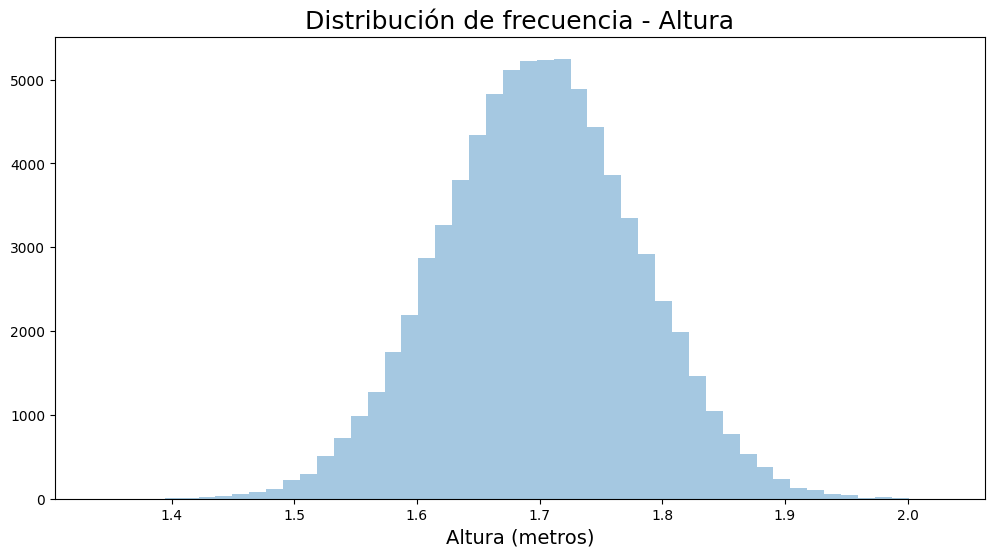

In [91]:
ax = sns.distplot(datos.Altura, kde = False)

ax.figure.set_size_inches(12,6)
ax.set_title('Distribución de frecuencia - Altura', fontsize=18)
ax.set_xlabel('Altura (metros)', fontsize=14)
ax

/tmp/ipython-input-92-1464856638.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(datos.Altura, kde = True)


<Axes: title={'center': 'Distribución de frecuencia - Altura'}, xlabel='Altura (metros)', ylabel='Density'>

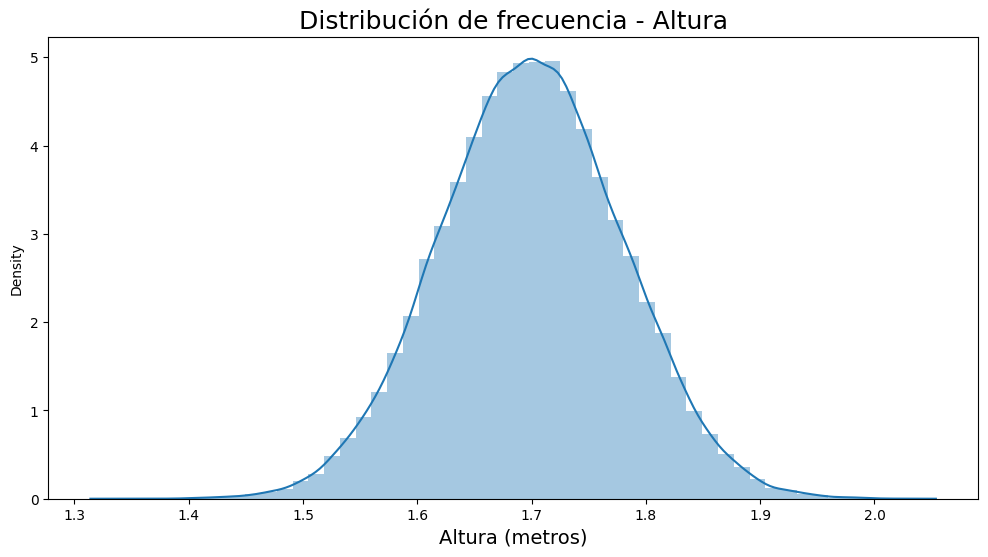

In [92]:
ax = sns.distplot(datos.Altura, kde = True)
ax.figure.set_size_inches(12,6)
ax.set_title('Distribución de frecuencia - Altura', fontsize=18)
ax.set_xlabel('Altura (metros)', fontsize=14)
ax

##medida de tendencia central
###media o promedia





In [109]:
import pandas as pd
df = pd.DataFrame(data  = {'María':[8,10,4,8,6,10,8],
                           'Pedro':[10,2,0.5,1,3,9.5,10],
                           'Pablo':[7.5,8,7,8,8,8.5,7]},
                  index = ['Matemática',
                          'Portuges',
                           'Ingles',
                          'Geografía',
                          'Historia',
                          'Fisica',
                          'Quimica'])
df.rename_axis('Asignaturas',axis = 'columns', inplace = True)
df

Asignaturas,María,Pedro,Pablo
Matemática,8,10.0,7.5
Portuges,10,2.0,8.0
Ingles,4,0.5,7.0
Geografía,8,1.0,8.0
Historia,6,3.0,8.0
Fisica,10,9.5,8.5
Quimica,8,10.0,7.0


In [108]:
(8+10+4+8+6+10+8)/7

7.714285714285714

In [97]:
df['María'].mean()

np.float64(7.714285714285714)

In [96]:
datos.groupby(['Sexo'])['Ingreso'].mean()

,Ingreso
Sexo,
0,2192.441596
1,1566.847393


##mediana

In [99]:
notas_maria = df['María']
notas_maria


,María
Matemática,8
Portuges,10
Ingles,4
Geografía,8
Historia,6
Fisica,10
Quimica,8


In [100]:
notas_maria = notas_maria.sort_values()
notas_maria

,María
Ingles,4
Historia,6
Geografía,8
Matemática,8
Quimica,8
Portuges,10
Fisica,10


In [101]:
n = notas_maria.shape[0]
n

7

In [103]:
notas_maria = notas_maria.reset_index()
notas_maria

,level_0,index,María
0,0,Ingles,4
1,1,Historia,6
2,2,Geografía,8
3,3,Matemática,8
4,4,Quimica,8
5,5,Portuges,10
6,6,Fisica,10


In [104]:
elemento_md = (n+1)/2
elemento_md

4.0

In [105]:
notas_maria.loc[elemento_md -1]

,3
level_0,3
index,Matemática
María,8


In [111]:
notas_maria['María'].median()

8.0

In [112]:
notas_pedro = df['Pedro'].sample(6,random_state= 200)
notas_pedro

,Pedro
Geografía,1.0
Fisica,9.5
Quimica,10.0
Historia,3.0
Matemática,10.0
Portuges,2.0


In [113]:
notas_pedro = notas_pedro.sort_values()
notas_pedro

,Pedro
Geografía,1.0
Portuges,2.0
Historia,3.0
Fisica,9.5
Quimica,10.0
Matemática,10.0


In [115]:
n = notas_pedro.shape[0]
n

6

In [116]:
notas_pedro = notas_pedro.reset_index()
notas_pedro

,index,Pedro
0,Geografía,1.0
1,Portuges,2.0
2,Historia,3.0
3,Fisica,9.5
4,Quimica,10.0
5,Matemática,10.0


In [119]:
elemento_md = int(n / 2)
elemento_md

3

In [120]:
(notas_pedro.loc[elemento_md - 1][1] + notas_pedro.loc[elemento_md][1]) /2

np.float64(6.25)

In [122]:
datos.Ingreso.median()

1200.0

##la moda

In [123]:
df.mode()

Asignaturas,María,Pedro,Pablo
0,8,10.0,8.0


In [124]:
ejemplo = pd.Series([1,2,2,3,4,4,5,6,7])
ejemplo

,0
0,1
1,2
2,2
3,3
4,4
5,4
6,5
7,6
8,7


In [125]:
ejemplo.mode()

,0
0,2
1,4


In [128]:
datos.Ingreso.mode()

,Ingreso
0,788


In [129]:
datos.Altura.mode()

,Altura
0,1.568128
1,1.671225
2,1.681659
3,1.692977
4,1.708163
5,1.708370
6,1.753842
7,1.779073
8,1.796462


##Relación entre medidas de tendencia central

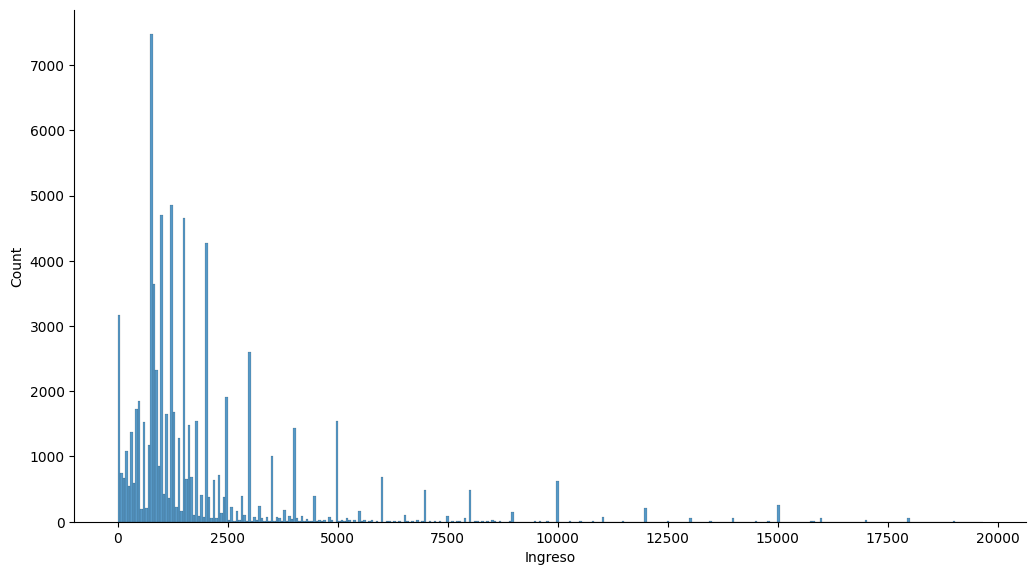

In [133]:
ax = sns.displot(datos.query("Ingreso < 20000").Ingreso)
ax.figure.set_size_inches(12,6)
ax

In [134]:
Moda = datos.Ingreso.mode()[0]
Moda

np.int64(788)

In [135]:
Mediana = datos.Ingreso.median()
Mediana

1200.0

In [136]:
Media = datos.Ingreso.mean()
Media

np.float64(2000.3831988547631)

In [138]:
Moda < Mediana < Media

np.True_

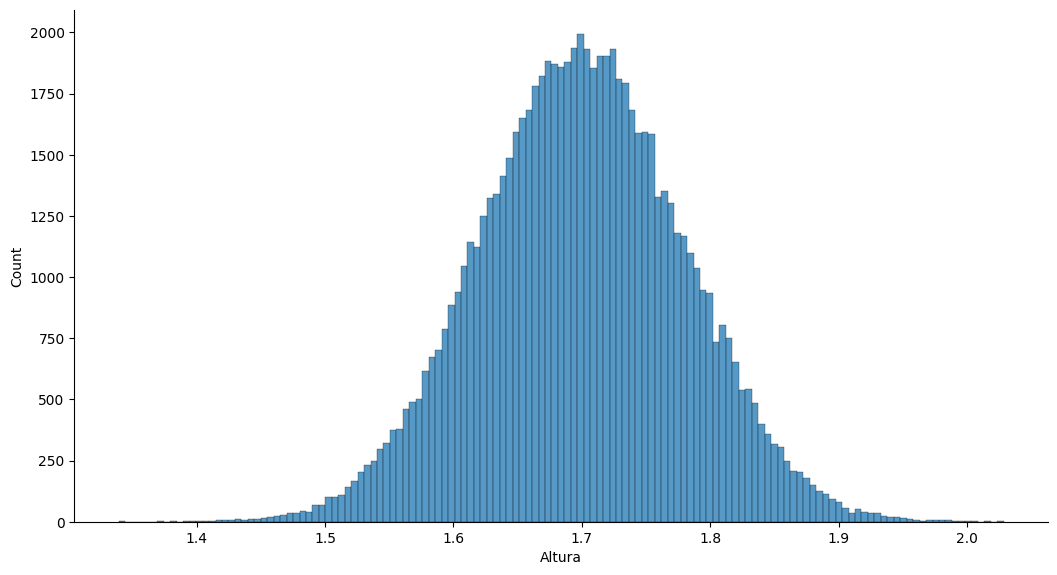

In [139]:
ax = sns.displot(datos.Altura)
ax.figure.set_size_inches(12,6)
ax

In [140]:
Moda = datos.Altura.mode()
Moda

,Altura
0,1.568128
1,1.671225
2,1.681659
3,1.692977
4,1.708163
5,1.708370
6,1.753842
7,1.779073
8,1.796462


In [141]:
Media = datos.Altura.mean()
Media

np.float64(1.6995124540575741)

In [142]:
Mediana = datos.Altura.median()
Mediana

1.6993247325

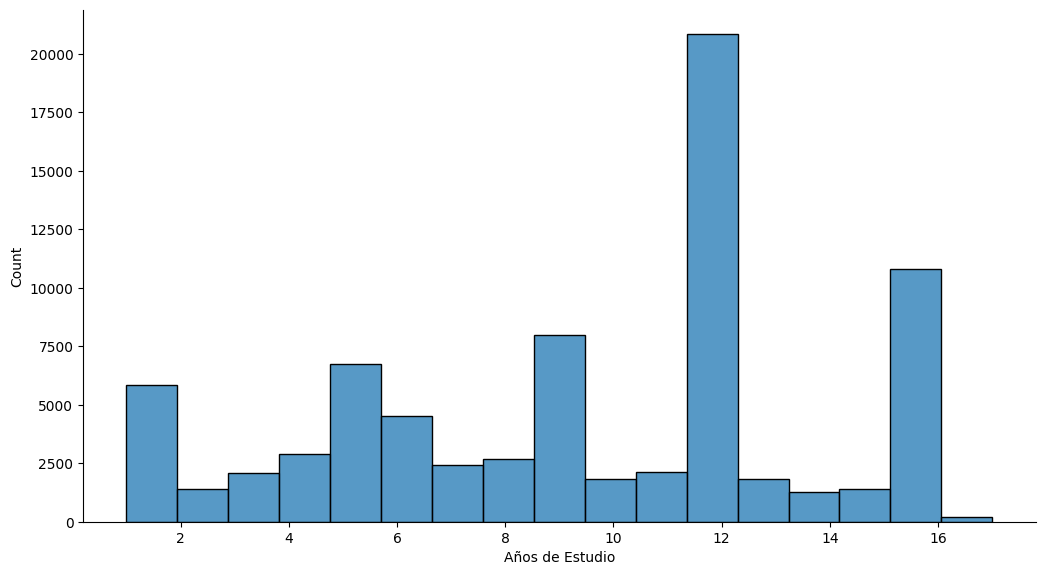

In [143]:
ax = sns.displot(datos["Años de Estudio"],bins = 17)
ax.figure.set_size_inches(12,6)
ax

In [145]:
Moda = datos["Años de Estudio"].mode()[0]
Moda

np.int64(12)

In [146]:
Mediana = datos["Años de Estudio"].median()
Mediana

11.0

In [147]:
Media = datos["Años de Estudio"].mean()
Media

np.float64(9.469664237376367)

In [148]:
Moda > Mediana > Media

np.True_

## Definicion de cuartiles, deciles y percentiles

In [153]:
datos.Ingreso.quantile ([0.25, 0.5, 0.75])

,Ingreso
0.25,788.0
0.50,1200.0
0.75,2000.0


In [154]:
[i/10 for i in range(1,10)]

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [155]:
datos.Ingreso.quantile ([i/10 for i in range(1,10)])

,Ingreso
0.1,350.0
0.2,788.0
0.3,800.0
0.4,1000.0
0.5,1200.0
0.6,1500.0
0.7,1900.0
0.8,2500.0
0.9,4000.0


In [157]:
datos.Ingreso.quantile ([i/100 for i in range(1,100)])

,Ingreso
0.01,0.0
0.02,0.0
0.03,0.0
0.04,50.0
0.05,100.0
...,...
0.95,6000.0
0.96,7000.0
0.97,8000.0
0.98,10000.0


<Axes: title={'center': 'Distribucion de Frecuencia Acumulada'}, xlabel='Años', ylabel='Acumulado'>

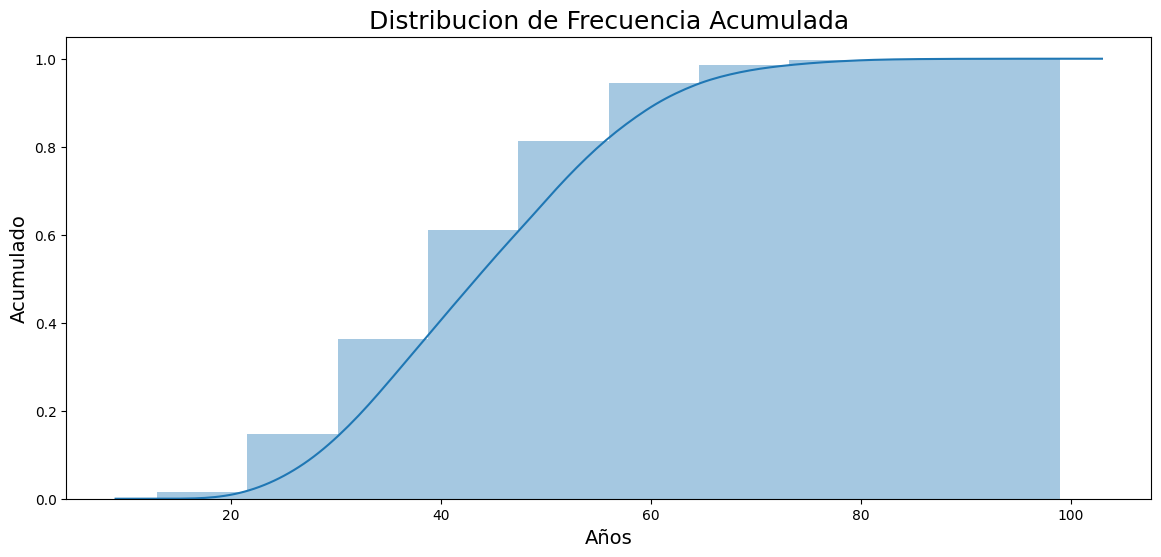

In [160]:
ax = sns.distplot(datos.Edad,
                 hist_kws={'cumulative': True},
                 kde_kws={'cumulative': True},
                 bins = 10)
ax.figure.set_size_inches(14,6)
ax.set_title('Distribucion de Frecuencia Acumulada', fontsize=18)
ax.set_ylabel('Acumulado', fontsize=14)
ax.set_xlabel('Años', fontsize=14)
ax

In [162]:
datos.Edad.quantile ([i/10 for i in range(1,10)])

,Edad
0.1,28.0
0.2,33.0
0.3,36.0
0.4,40.0
0.5,43.0
0.6,47.0
0.7,51.0
0.8,55.0
0.9,61.0


<Axes: title={'center': 'Altura'}, xlabel='Metros'>

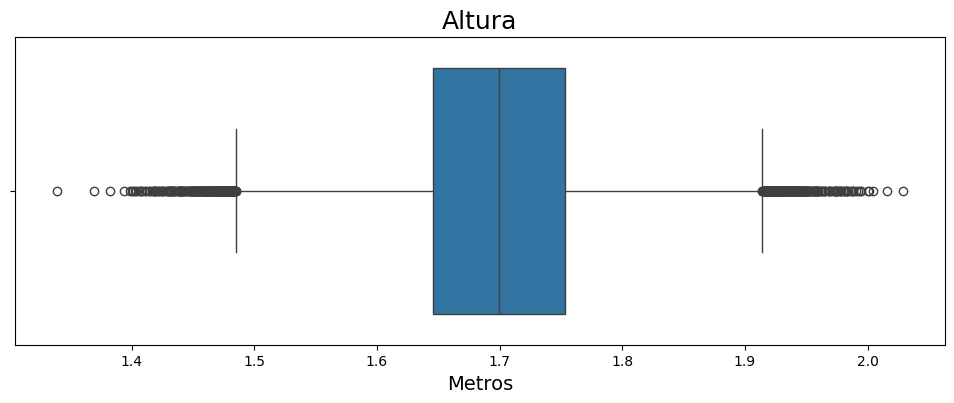

In [163]:
ax = sns.boxplot(x = 'Altura', data=datos, orient = 'h')

ax.figure.set_size_inches(12,4)
ax.set_title('Altura',fontsize=18)
ax.set_xlabel('Metros',fontsize=14)
ax

<Axes: title={'center': 'Altura'}, xlabel='Metros', ylabel='Sexo'>

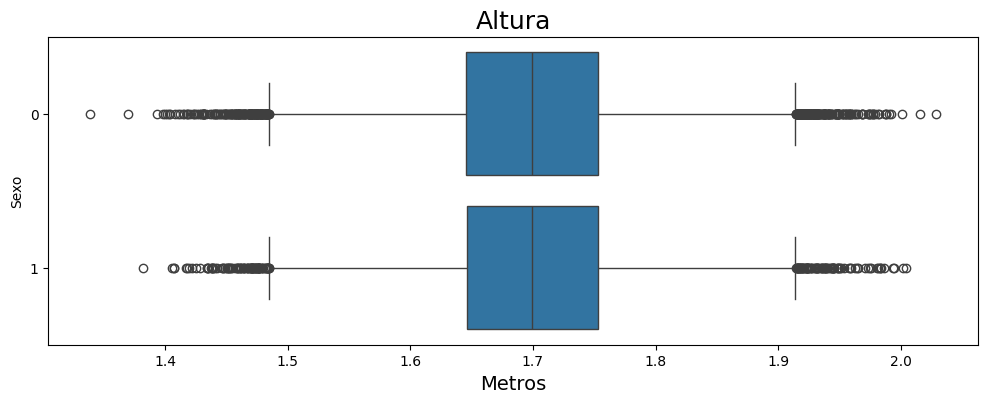

In [164]:
ax = sns.boxplot(x = 'Altura', y = 'Sexo', data=datos, orient= 'h')


ax.figure.set_size_inches(12,4)
ax.set_title('Altura',fontsize=18)
ax.set_xlabel('Metros',fontsize=14)
ax

<Axes: title={'center': 'Ingreso'}, xlabel='Miles de pesos'>

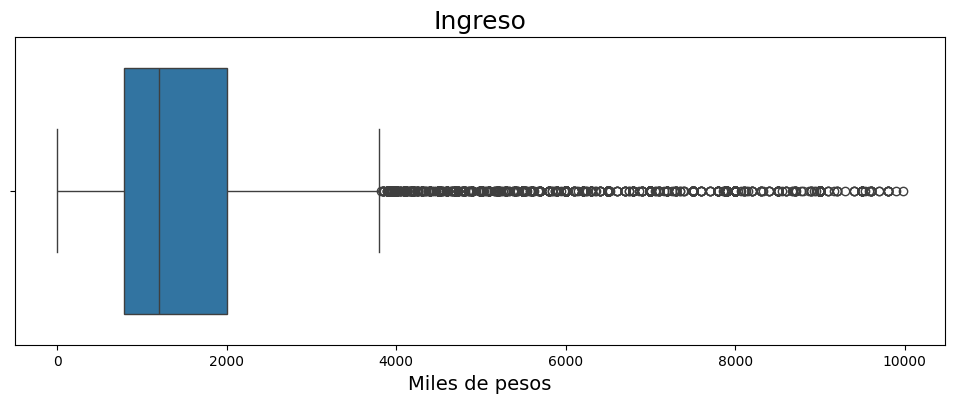

In [166]:
ax = sns.boxplot(x = 'Ingreso', data=datos.query("Ingreso < 10000"), orient = 'h')

ax.figure.set_size_inches(12,4)
ax.set_title('Ingreso',fontsize=18)
ax.set_xlabel('Miles de pesos',fontsize=14)
ax

<Axes: title={'center': 'Ingreso'}, xlabel='Miles de pesos', ylabel='Sexo'>

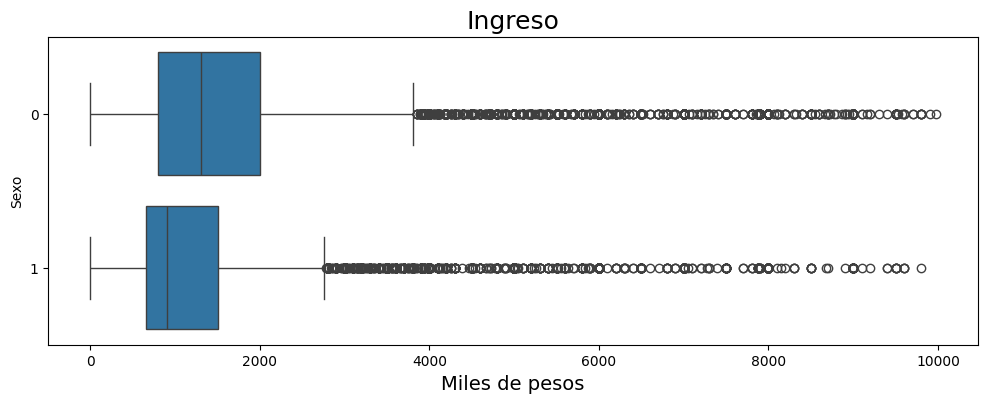

In [167]:
ax = sns.boxplot(x = 'Ingreso', y = 'Sexo', data=datos.query("Ingreso < 10000"), orient = 'h')

ax.figure.set_size_inches(12,4)
ax.set_title('Ingreso',fontsize=18)
ax.set_xlabel('Miles de pesos',fontsize=14)
ax

<Axes: title={'center': 'Años de Estudio'}, xlabel='Años'>

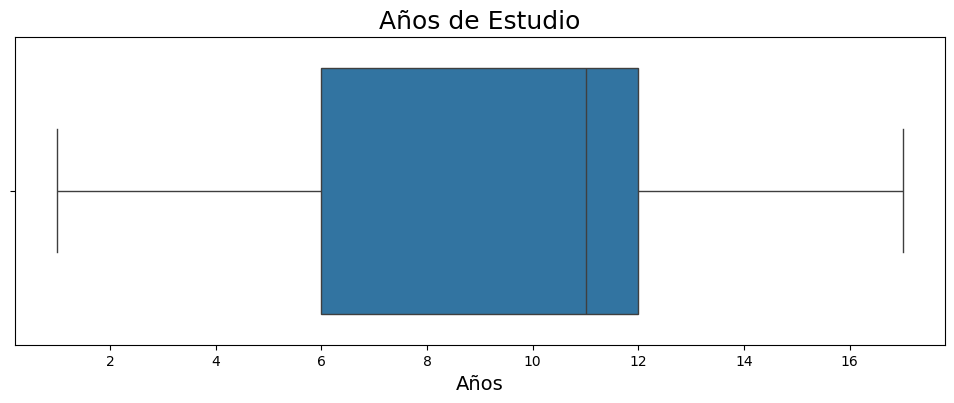

In [169]:
ax = sns.boxplot(x = 'Años de Estudio', data=datos, orient= 'h')

ax.figure.set_size_inches(12,4)
ax.set_title('Años de Estudio',fontsize=18)
ax.set_xlabel('Años',fontsize=14)
ax

<Axes: title={'center': 'Años de Estudio'}, xlabel='Años', ylabel='Sexo'>

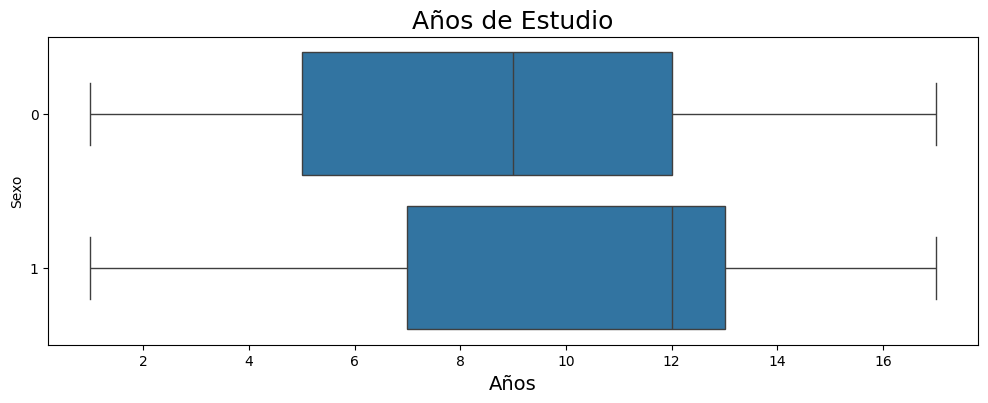

In [170]:
ax = sns.boxplot(x = 'Años de Estudio', y = 'Sexo',data=datos, orient ='h')

ax.figure.set_size_inches(12,4)
ax.set_title('Años de Estudio',fontsize=18)
ax.set_xlabel('Años',fontsize=14)
ax

## Medidas de dispersion

In [171]:
df

Asignaturas,María,Pedro,Pablo
Matemática,8,10.0,7.5
Portuges,10,2.0,8.0
Ingles,4,0.5,7.0
Geografía,8,1.0,8.0
Historia,6,3.0,8.0
Fisica,10,9.5,8.5
Quimica,8,10.0,7.0


In [172]:
notas_maria_dispersion = df[['María']]
notas_maria_dispersion

Asignaturas,María
Matemática,8
Portuges,10
Ingles,4
Geografía,8
Historia,6
Fisica,10
Quimica,8


In [174]:
notas_media_maria = notas_maria_dispersion.mean()[0]
notas_media_maria

np.float64(7.714285714285714)

In [175]:
notas_maria_dispersion['Desviacion'] = notas_maria_dispersion['María'] - notas_media_maria
notas_maria_dispersion

Asignaturas,María,Desviacion
Matemática,8,0.285714
Portuges,10,2.285714
Ingles,4,-3.714286
Geografía,8,0.285714
Historia,6,-1.714286
Fisica,10,2.285714
Quimica,8,0.285714


In [176]:
notas_maria_dispersion['|Desviacion|'] = notas_maria_dispersion['Desviacion'].abs()
notas_maria_dispersion

Asignaturas,María,Desviacion,|Desviacion|
Matemática,8,0.285714,0.285714
Portuges,10,2.285714,2.285714
Ingles,4,-3.714286,3.714286
Geografía,8,0.285714,0.285714
Historia,6,-1.714286,1.714286
Fisica,10,2.285714,2.285714
Quimica,8,0.285714,0.285714


In [177]:
!pip install scipy

In [178]:
import scipy.stats as stats

In [180]:
mad_notas_maria = stats.median_abs_deviation(notas_maria_dispersion['María'])
mad_notas_maria

np.float64(2.0)

In [183]:
notas_maria_dispersion['(Desviacion)^2']= notas_maria_dispersion['|Desviacion|'].pow(2)
notas_maria_dispersion

Asignaturas,María,Desviacion,|Desviacion|,(Desviacion)^2
Matemática,8,0.285714,0.285714,0.081633
Portuges,10,2.285714,2.285714,5.224490
Ingles,4,-3.714286,3.714286,13.795918
Geografía,8,0.285714,0.285714,0.081633
Historia,6,-1.714286,1.714286,2.938776
Fisica,10,2.285714,2.285714,5.224490
Quimica,8,0.285714,0.285714,0.081633


In [185]:
notas_maria_dispersion['(Desviacion)^2'].sum() / (len(notas_maria_dispersion) -1)

np.float64(4.57142857142857)

In [186]:
notas_maria_dispersion['María'].var()

4.57142857142857

In [187]:
varianza = notas_maria_dispersion['María'].var()
varianza

4.57142857142857

In [188]:
np.sqrt(varianza)

np.float64(2.1380899352993947)

In [189]:
desviacion_estandar = notas_maria_dispersion['María'].std()
desviacion_estandar

2.1380899352993947

In [190]:
df.mean()

,0
Asignaturas,
María,7.714286
Pedro,5.142857
Pablo,7.714286


In [191]:
df.median()

,0
Asignaturas,
María,8.0
Pedro,3.0
Pablo,8.0


In [192]:
df.mode()

Asignaturas,María,Pedro,Pablo
0,8,10.0,8.0


In [193]:
df.std()

,0
Asignaturas,
María,2.138090
Pedro,4.460141
Pablo,0.566947
